# Genre-Driven Storytelling from Images using PyTorch XPU backend
## Overview
This sample explores the generation of creative, genre-specific stories from images, specifically optimized for Intel hardware using the PyTorch XPU backend. 

## Workflow
It takes an image and a user-defined genre (e.g., fantasy, horror, romance, sci-fi) as input and leverages a Vision Language Model (VLM) to craft engaging narratives that are visually inspired and thematically aligned with the chosen genre.

<img width="600" alt="image" src="./assets/story-generation.png">

## Import Necessary Packages

In [1]:
from transformers import Qwen2_5_VLForConditionalGeneration, AutoTokenizer, AutoProcessor
import torch
from ipywidgets import FileUpload, SelectionSlider, RadioButtons, Image
from IPython.display import display
from qwen_vl_utils import process_vision_info
from PIL import Image
import io
import matplotlib.pyplot as plt

In [2]:
from huggingface_hub import login
login()

## Story Generation Module

In [3]:
def story_generation(image, genre):
    model_id = "Qwen/Qwen2.5-VL-3B-Instruct"
    model = Qwen2_5_VLForConditionalGeneration.from_pretrained(
        model_id,
        torch_dtype=torch.bfloat16,
    )
    model = model.to("xpu")
    min_pixels = 256*28*28
    max_pixels = 1280*28*28
    processor = AutoProcessor.from_pretrained(model_id, 
                                              min_pixels=min_pixels, 
                                              max_pixels=max_pixels)

    
    messages = [
        {
            "role": "user",
            "content": [
                {
                    "type": "image",
                    "image": image,
                },
                {
                    "type": "text",
                    # "text": prompt,
                    "text": f"Generate a creative {genre} story inspired by this image. Focus on the characters (if any are visible, describe them briefly), the atmosphere of the scene, and the potential narrative that could unfold. Craft an engaging plot and ensure the story conveys a suitable moral."                    
                },
            ],
        }
    ]
    # Preparation for inference
    text = processor.apply_chat_template(
        messages, 
        tokenize=False, 
        add_generation_prompt=True
    )
    image_inputs, video_inputs = process_vision_info(messages)
    inputs = processor(text=[text], 
                   images=[image], 
                   padding=True, 
                   return_tensors="pt")
    inputs = inputs.to("xpu")
    
    # Generation of the output
    generated_ids = model.generate(**inputs, 
                                   temperature=0.9,
                                   top_p=0.99,
                                   top_k=40,
                                   do_sample=True,
                                   max_new_tokens=512)
    generated_ids_trimmed = [
        out_ids[len(in_ids) :] for in_ids, out_ids in zip(inputs.input_ids, generated_ids)
    ]
    output_text = processor.batch_decode(
        generated_ids_trimmed, skip_special_tokens=True, clean_up_tokenization_spaces=False
    )
    del model, processor, inputs
    return output_text[0]

## User-provided inputs

### Upload image

In [4]:
def process_image(upload):
    file_info = upload.value[0]  
    name = file_info['name']
    content = file_info['content']  
    image = Image.open(io.BytesIO(content))
    return image


In [5]:
# Create file upload widget
upload = FileUpload(accept='image/*', multiple=False)
display("Please upload an image using the below button:", upload)


'Please upload an image using the below button: '

FileUpload(value=(), accept='image/*', description='Upload')

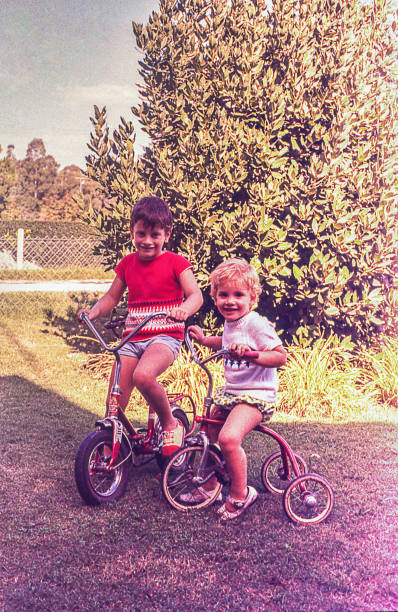

In [6]:
image = process_image(upload)
image

### Select Genre for the story

In [7]:
genre = RadioButtons(
    options=['Fantasy', 'Horror', 'Science Fiction', 'Thriller and Suspense', 'Romance', 'Historical fiction'],
    value='Fantasy', # Default'
    description='Genre',
    disabled=False
)
display(genre)

RadioButtons(description='Genre', options=('Fantasy', 'Horror', 'Science Fiction', 'Thriller and Suspense', 'R…

In [8]:
torch.xpu.empty_cache()

## Story Generation

In [9]:
print(genre.value)
story = story_generation(image, genre.value)
story

Horror


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


'In the heart of a lush suburban neighborhood, where the houses stood tall like sentinels, there lay a hidden secret. The scene was as inviting as always, but it held a sinister undercurrent beneath its tranquility. On a sunny afternoon, two children, a boy with wild brown hair and a girl with short blond curls, set off on their red tricycles, the tires squeaking softly against the pavement.\n\nThe boy\'s red shirt clung to his lean frame, while the girl’s light-colored one matched the dandelions she wore in her dirty blond hair. Their joy was palpable, but underneath their exuberance, something was amiss. As they cycled further into the trees, the forest behind them seemed to close in around them, a dark presence hidden from sight yet lurking just beyond the foliage.\n\nSuddenly, the air grew thick with anticipation. Shadows danced playfully along the branches, but within moments, they were swallowed by the thick embrace of the greenery. The sun began to wane, casting eerie shadows ac

## Sample Outputs

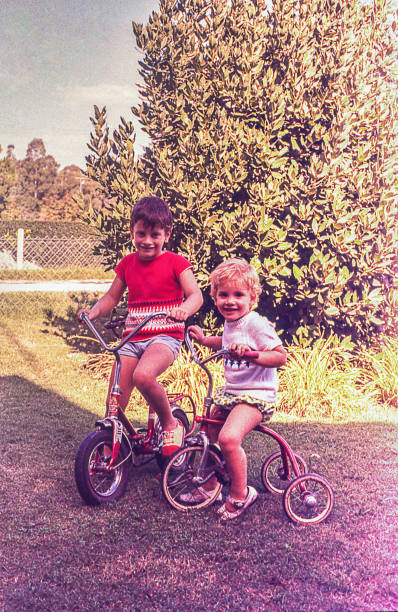

In [18]:
display(image)

### Fantasy Genre

In [12]:
print(genre.value)
story = story_generation(image, genre.value)
story

Fantasy


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

'In the heart of a lush, sunlit garden, two children, a boy and a girl, were enjoying their day on tricycles. The boy, with his tousled brown hair and bright red shirt, pedaled confidently, his face lit up with a smile as he looked back at the girl beside him. She had short blonde hair and was dressed in a white shirt and patterned shorts, her cheeks rosy from the warm afternoon sun.\n\nThe garden was a vibrant tapestry of greenery, with tall trees casting dappled shadows across the grassy expanse. The air was filled with the sweet scent of blooming flowers and the gentle rustling of leaves. It was a perfect day for outdoor play, and the children seemed to be relishing every moment.\n\nAs they rode their tricycles, the boy glanced over at the girl, noticing her curious expression. "Want to race?" he asked, his voice filled with excitement.\n\nThe girl\'s eyes widened with delight. "Yes!" she replied, her small hands gripping the handlebars tightly. "Let\'s go!"\n\nWith a burst of energ

### Science Fiction

In [13]:
print(genre.value)
story = story_generation(image, genre.value)
story

Science Fiction


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

'In the year 2050, the world had transformed into a utopian society where technology had advanced to the point of making childhood experiences magical. The image you\'ve described is not just a snapshot but a portal to a world where children\'s dreams come true.\n\nThe scene takes place in a lush, green park, bathed in the warm glow of a setting sun. Two children, a boy and a girl, are riding their tricycles, their laughter echoing through the air. The boy, with his tousled hair and bright red shirt, is slightly taller than the girl, who has short blonde hair and wears a white t-shirt and patterned shorts. Their tricycles are adorned with colorful stickers, and they both wear helmets for safety.\n\nAs they ride, the boy looks back at the girl, a smile playing on his lips. "Did you see that? It\'s like we\'re flying!" he exclaims, pointing towards a distant tree. The girl giggles, her eyes sparkling with excitement. "I know! It\'s so cool!"\n\nSuddenly, a sudden gust of wind stirs up th

### Historic fiction

In [14]:
print(genre.value)
story = story_generation(image, genre.value)
story

Womens fiction


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

'In the heart of a sunlit backyard, two young girls sat on their tricycles, their laughter echoing through the air. The older girl, with her curly brown hair tied into a messy bun, wore a vibrant red shirt and shorts, her face lit up with a smile as she pedaled her bike. Beside her, the younger girl, with her blonde curls cascading down her shoulders, was dressed in a white t-shirt and patterned shorts. Her eyes sparkled with excitement as she looked at her friend.\n\nThe scene was serene, the green grass stretching out before them, and tall trees stood sentinel in the background. The air was filled with the gentle rustling of leaves and the distant chirping of birds. It was a perfect day for a bike ride, and the girls were eager to explore the neighborhood.\n\nAs they pedaled along, the older girl noticed something unusual—a small, colorful object lying on the ground near the tree. Curious, she stopped her bike and bent down to pick it up. It was a shiny, round object, possibly a toy 

### Thriller and Suspense

In [15]:
print(genre.value)
story = story_generation(image, genre.value)
story

Thriller and Suspense


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

'In the heart of a sunlit backyard, two children were about to embark on an adventure that would test their courage and friendship. The older child, a boy with curly brown hair, sat atop a red tricycle, his eyes gleaming with excitement. He was dressed in a vibrant red shirt and matching shorts, his face a picture of joy. Beside him, a younger girl with blonde hair sat on another red tricycle. She wore a white shirt and a patterned skirt, her smile as bright as the day.\n\nThe atmosphere was one of pure childhood wonder and innocence. The grass was lush and green, the sky above a clear blue, and the trees in the background stood tall and proud. It was a perfect day for a bike ride, and the children couldn\'t wait to start their journey.\n\nAs they pedaled away from the fence, the older boy looked back at his companion, his eyes filled with a mix of pride and affection. "Let\'s go, little one," he said, his voice full of encouragement.\n\nThe younger girl nodded eagerly, her hands gripp

### Romance

In [17]:
print(genre.value)
story = story_generation(image, genre.value)
story

Romance


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

'In the heart of a sunlit backyard, two children, a boy and a girl, sat on their tricycles, their faces beaming with joy. The boy, with his curly brown hair and bright red shirt, was perched on a bicycle with training wheels, while the girl, with her blonde curls and white shirt, sat on a tricycle with a single wheel. They were both wearing sandals, their feet firmly planted on the ground as they looked up at the sky.\n\nThe atmosphere was one of pure childhood wonder and innocence. The lush green grass under their feet contrasted beautifully with the vibrant colors of their clothing. The trees in the background provided a serene backdrop, their leaves rustling gently in the breeze. The sun cast long shadows across the yard, creating a warm and inviting scene.\n\nAs they sat there, the boy spoke first, his voice filled with excitement. "Do you think we can ride our bikes all the way to the park?" he asked, his eyes sparkling with anticipation.\n\nThe girl nodded eagerly, her smile wide

### Horror Genre

In [9]:
genre.value

'Horror'

In [8]:
story = story_generation(image, genre.value)
story

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


"In the heart of a sunlit backyard, two children sat on their tricycles, their laughter echoing through the air. The older child, with curly brown hair and a red shirt, held onto the handlebars of his tricycle, while the younger child, with blonde hair and a white shirt, clutched the seat of his. Both were smiling, their eyes sparkling with joy.\n\nThe atmosphere was one of innocence and happiness, but beneath the surface, a dark shadow began to loom. The older child, named Timmy, noticed something amiss. His tricycle had a strange, metallic sheen that seemed to shimmer in the sunlight. He reached out to touch it, and as he did, a cold breeze swept through the yard, carrying with it an eerie scent.\n\nTimmy's hand closed around the handlebar, and suddenly, the tricycle began to move without his control. It tilted to one side, and Timmy found himself falling off. He landed hard on the grass, his head spinning. As he tried to get up, he felt a sharp pain in his leg. He looked down and sa